In [1]:
!pip install numpy
!pip install scipy
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


### How to read an image: Pillow

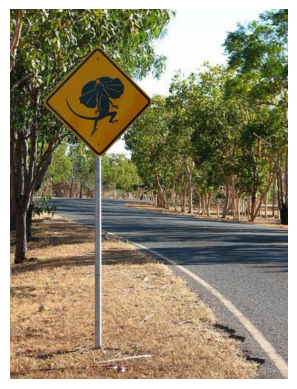

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Open an image file
img = Image.open("signal.png")
# Display the image
#img.show()
plt.axis('off')
plt.imshow(img)

In [4]:
img_np = np.array(img)

In [4]:
img_np.shape # RGBA R:red, G:green, B:BLue and A:alpha

(690, 518, 4)

## RGBA Channels

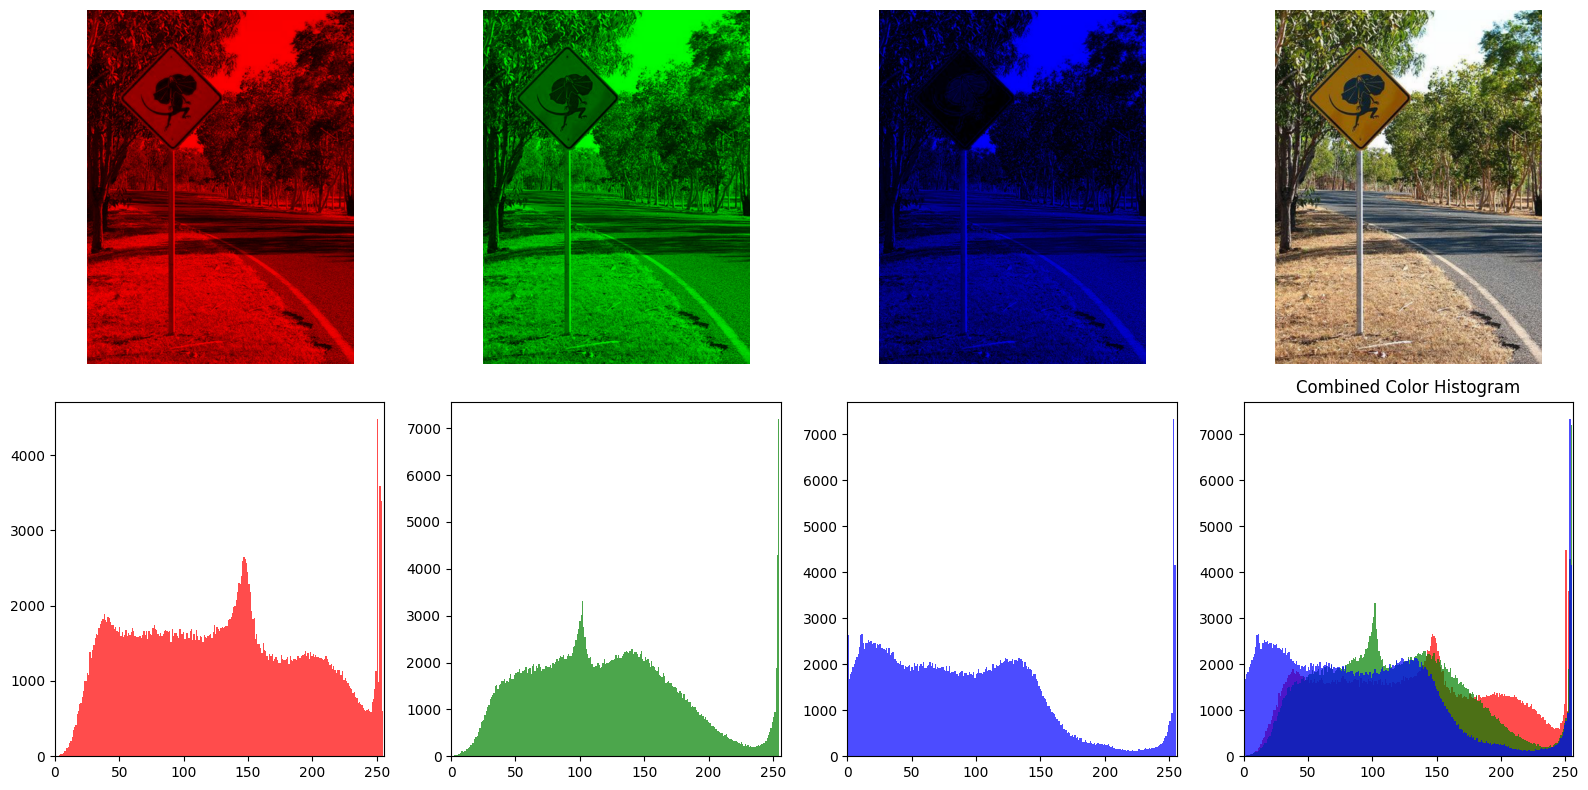

In [5]:
plt.figure(figsize=(16, 8))
# Split the channels
red, green, blue = img_np[:,:,0], img_np[:,:,1], img_np[:,:,2]
# Creating images with individual channels
red_only = img_np.copy()
red_only[:, :, 1] = 0  # Zero out the green channel
red_only[:, :, 2] = 0  # Zero out the blue channel
green_only = img_np.copy()
green_only[:, :, 0] = 0  # Zero out the red channel
green_only[:, :, 2] = 0  # Zero out the blue channel
blue_only = img_np.copy()
blue_only[:, :, 0] = 0  # Zero out the red channel
blue_only[:, :, 1] = 0  # Zero out the green channel
# Plotting the images with individual channels and the original image
for i, color_img in enumerate([red_only, green_only, blue_only, img_np], start=1):
    plt.subplot(2, 4, i)
    plt.imshow(color_img)
    plt.axis('off')
# Plotting the histograms for each channel and the combined histogram
for i, channel in enumerate([red, green, blue], start=5):
    plt.subplot(2, 4, i)
    plt.hist(channel.ravel(), bins=256, color=['red', 'green', 'blue'][i-5], alpha=0.7)
    plt.xlim([0, 256])

# Combined histogram
plt.subplot(2, 4, 8)
plt.hist(red.ravel(), bins=256, color='red', alpha=0.7)
plt.hist(green.ravel(), bins=256, color='green', alpha=0.7)
plt.hist(blue.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Combined Color Histogram')
plt.xlim([0, 256])
plt.tight_layout()
plt.show()

### Alpha channel

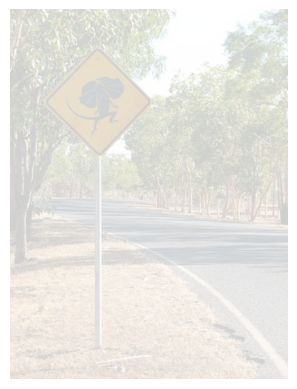

In [6]:
img_np_newalpha =  img_np.copy()
img_np_newalpha[:, :, 3] = img_np[:, :, 3] * 0.2
plt.axis('off')
plt.imshow(img_np_newalpha)

## Gray Scale : 

### Weighted (or Luminosity) Method
$Grayscale = 0.299*Red + 0.587*Green + 0.114*Blue $

### Average Method
$Grayscale = (Red + Green + Blue) / 3$

### Desaturation Method
$Grayscale = (Max(Red, Green, Blue) + Min(Red, Green, Blue)) / 2$


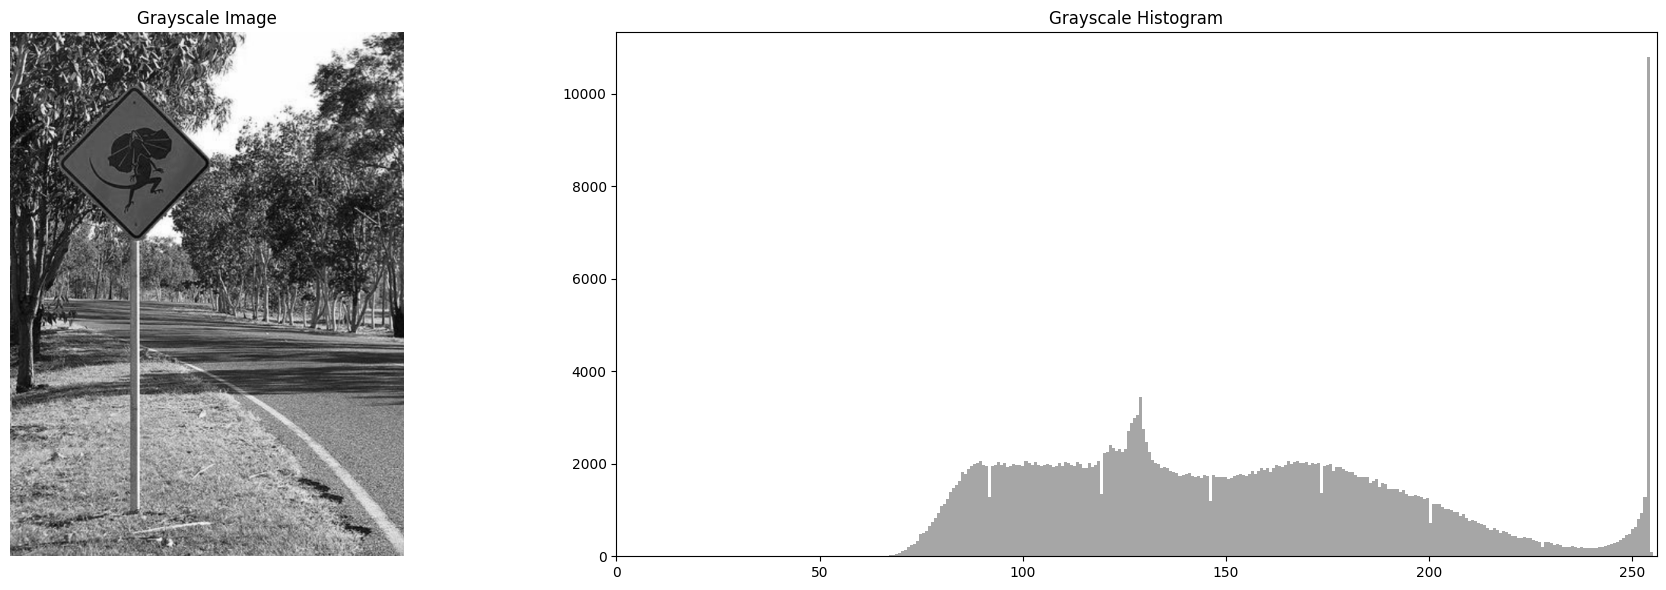

In [7]:
# Convert to grayscale by averaging the RGB channels
grayscale = img_np.mean(axis=2)
# Prepare the figure
plt.figure(figsize=(20, 6))
# Plotting the grayscale image
plt.subplot(1, 2, 1)
plt.imshow(grayscale, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
# Plotting the histogram for the grayscale image
plt.subplot(1, 2, 2)
plt.hist(grayscale.ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Grayscale Histogram')
plt.xlim([0, 256])
plt.tight_layout()
plt.show()

### HSV (Hue, Saturation, Value)  Space

Hue: Represents the color itself (like red, green, blue).

Saturation: Represents the intensity or purity of the color (from pastel shades to vivid colors).

Value (Brightness): Represents the brightness of the color (from dark to light).

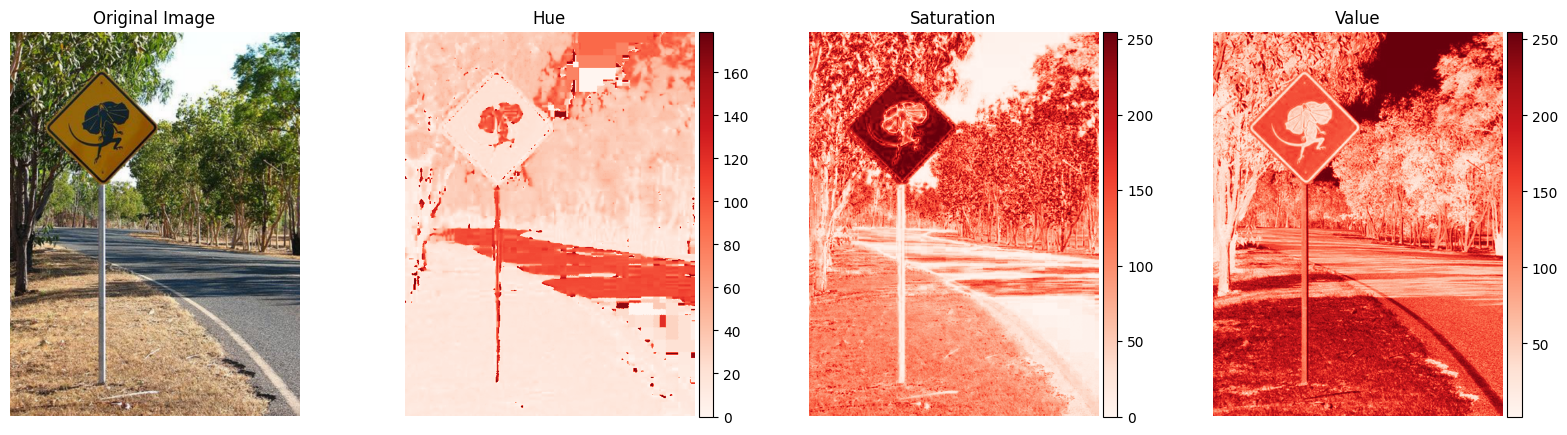

In [7]:
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def show_hsv_components(image_path):
    # Load the image using OpenCV
    img_bgr = cv2.imread(image_path)

    # Convert the image from BGR to RGB (OpenCV uses BGR by default)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Convert the image from RGB to HSV
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    # Split into the Hue, Saturation, and Value channels
    h, s, v = cv2.split(img_hsv)

    # Plotting
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    axes[0].imshow(img_rgb)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Define the colormap
    cmap = 'Reds'

    for i, channel in enumerate([h, s, v], start=1):
        im = axes[i].imshow(channel, cmap=cmap)
        axes[i].set_title(['Hue', 'Saturation', 'Value'][i-1])
        axes[i].axis('off')

        # Create an axis for the colorbar
        divider = make_axes_locatable(axes[i])
        cax = divider.append_axes("right", size="5%", pad=0.05)

        # Add the colorbar
        plt.colorbar(im, cax=cax)

    plt.show()

# Example usage
show_hsv_components("signal.png")


### Filtering colors using HSV space

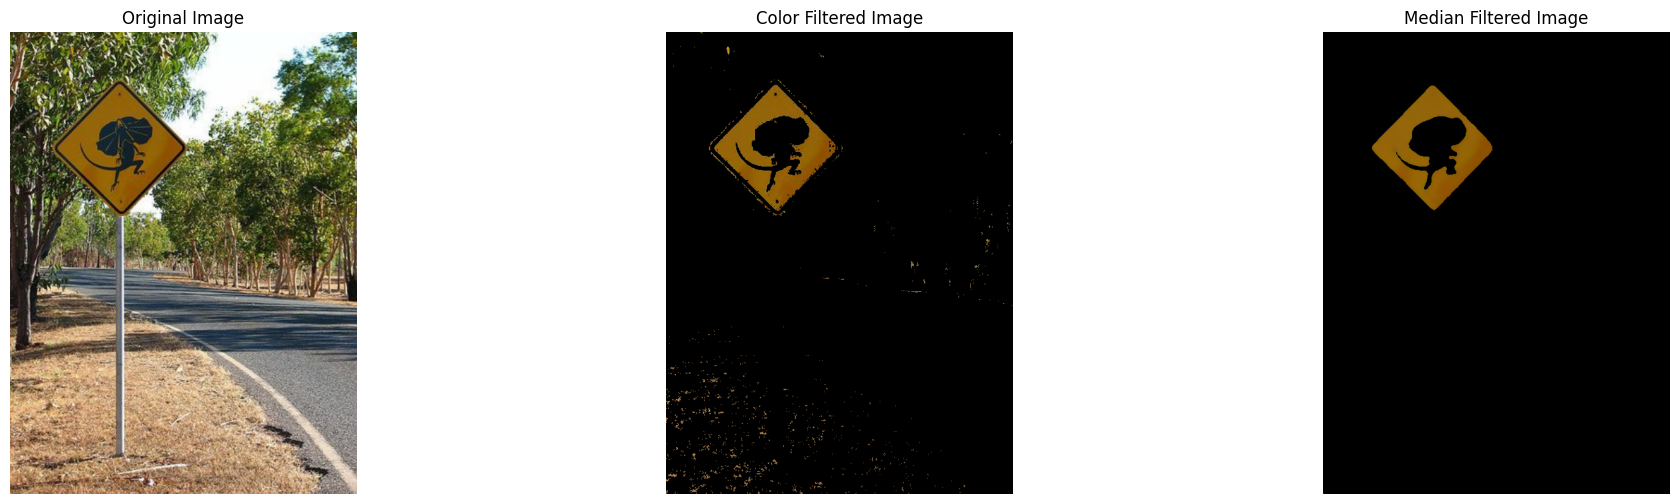

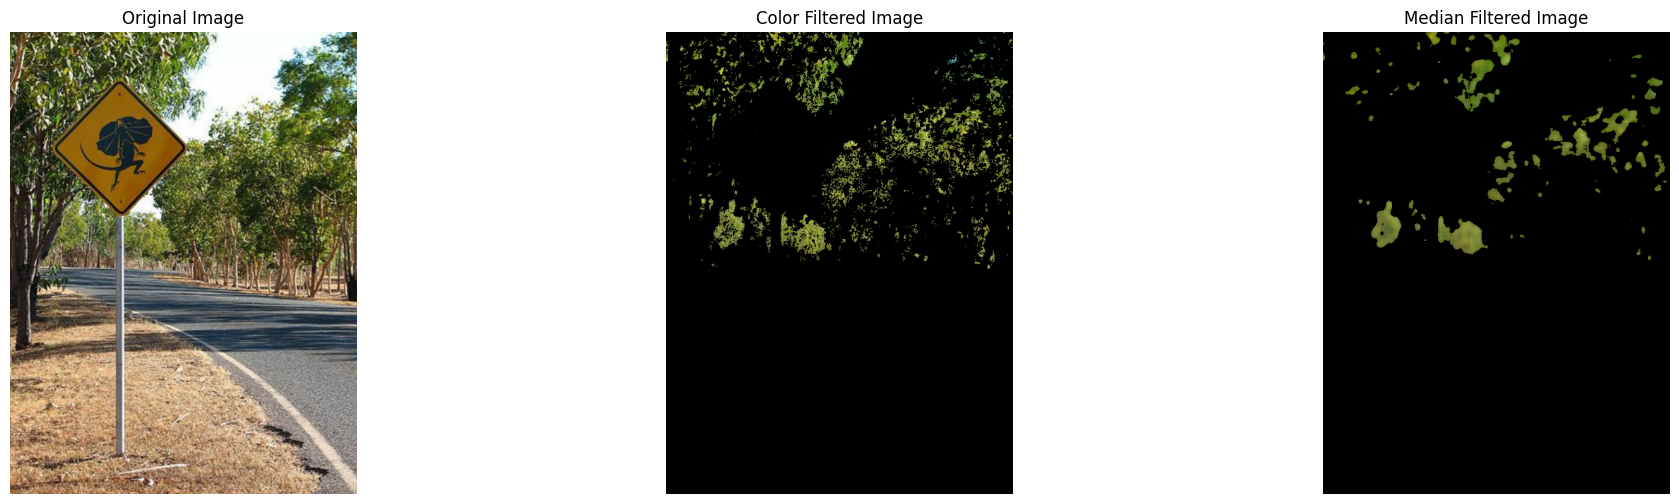

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def filter_specific_color(image_path, lower_color, upper_color):
    # Load the image using OpenCV
    img_bgr = cv2.imread(image_path)

    # Convert the image from BGR to HSV
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

    # Define the range of the specific color in HSV
    lower_bound = np.array(lower_color)  # e.g., [50, 100, 100] for lower green
    upper_bound = np.array(upper_color)  # e.g., [70, 255, 255] for upper green

    # Create a mask with the specified color range
    mask = cv2.inRange(img_hsv, lower_bound, upper_bound)

    # Apply the mask to the image
    result = cv2.bitwise_and(img_bgr, img_bgr, mask=mask)

    # Convert result to RGB for display
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    # Apply Median filter to the original image
    median_filtered_img = cv2.medianBlur(result_rgb, 9)

    # Displaying the original, the median filtered image, the masked image, and the blurred image
    fig, ax = plt.subplots(1, 3, figsize=(24, 6))

    ax[0].imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(result_rgb)
    ax[1].set_title('Color Filtered Image')
    ax[1].axis('off')



    ax[2].imshow(median_filtered_img)
    ax[2].set_title('Median Filtered Image')
    ax[2].axis('off')
    

    plt.show()




# Example usage: To filter green color
filter_specific_color("signal.png", [15, 130, 130], [27, 255, 255])
# Example usage: To filter green color
filter_specific_color("signal.png", [30, 100, 100], [100, 255, 255])

### Cross Correlation
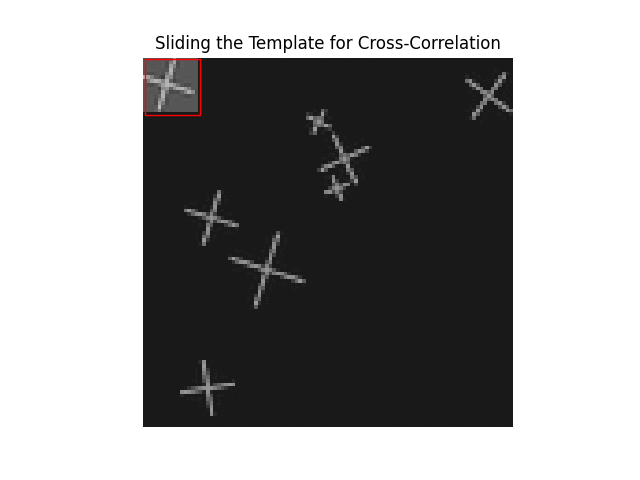

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


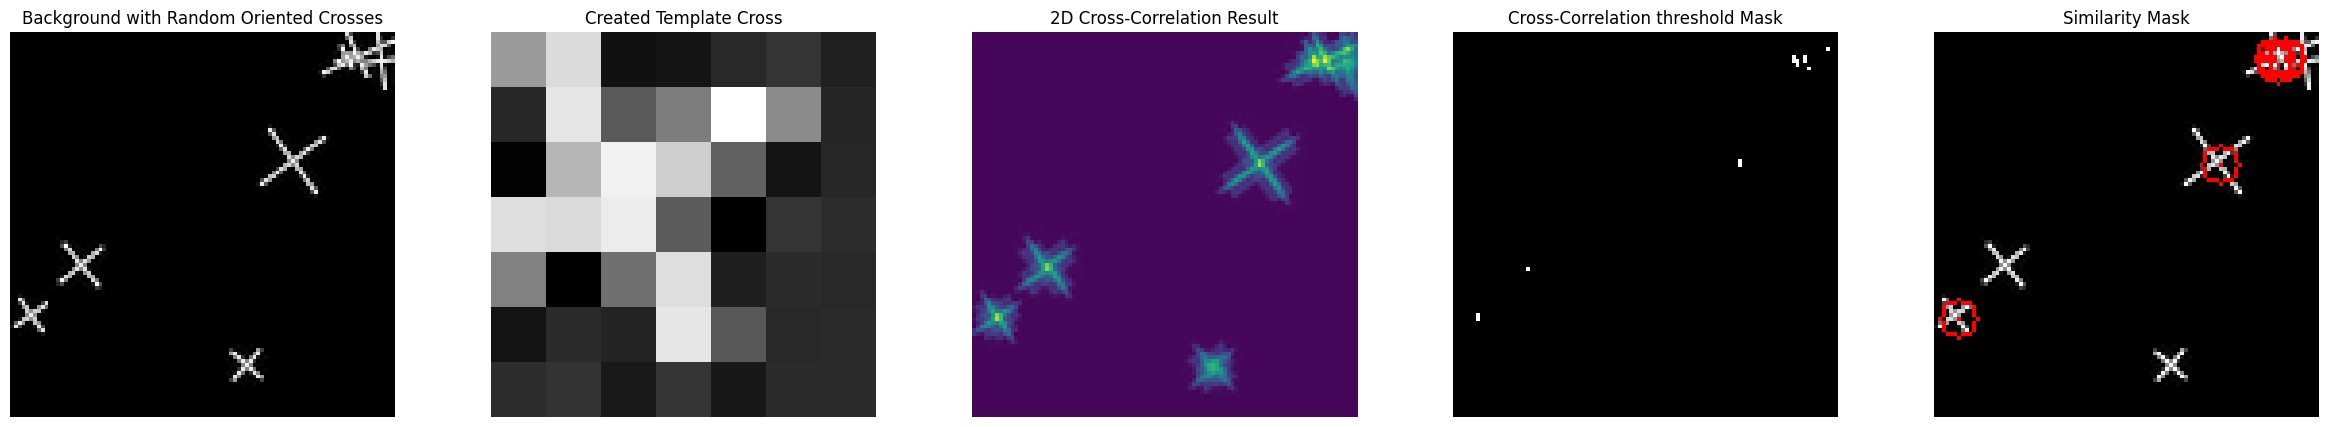

In [69]:
from scipy.ndimage import rotate
from scipy import signal
import numpy as np
def create_random_oriented_cross(image_size, cross_size, position, angle):
    """
    Create a cross in a numpy array of given size with a random orientation.

    :param image_size: Size of the image (height, width)
    :param cross_size: Size of the cross (must be odd)
    :param position: Position of the center of the cross (row, col)
    :param angle: Angle of rotation for the cross
    :return: numpy array with the cross
    """
    # Create a vertical cross at the center
    temp_size = max(image_size) + cross_size  # extra space for rotation
    temp_image = np.zeros((temp_size, temp_size))
    center = temp_size // 2
    half = cross_size // 2
    temp_image[center-half:center+half+1, center] = 1  # vertical part
    temp_image[center, center-half:center+half+1] = 1  # horizontal part

    # Rotate the cross
    rotated_cross = rotate(temp_image, angle, reshape=False)

    # Place the rotated cross in the original image
    image = np.zeros(image_size)
    row, col = position
    row_start = max(0, row - half)
    col_start = max(0, col - half)
    row_end = min(image_size[0], row + half + 1)
    col_end = min(image_size[1], col + half + 1)

    rotated_row_start = center - (row_end - row_start) // 2
    rotated_row_end = rotated_row_start + (row_end - row_start)
    rotated_col_start = center - (col_end - col_start) // 2
    rotated_col_end = rotated_col_start + (col_end - col_start)

    image[row_start:row_end, col_start:col_end] = rotated_cross[rotated_row_start:rotated_row_end, rotated_col_start:rotated_col_end]

    return image
    
# Record the positions, sizes, and angles of the crosses as we generate them
crosses_info = []
# Image size and number of crosses
image_size = (100, 100)
num_crosses = 7

# Create an image with random oriented crosses again
background = np.zeros(image_size)
for _ in range(num_crosses):
    cross_size = np.random.choice([15, 21, 7, 11])  # random size
    position = np.random.randint(0, image_size[0], 2)  # random position
    angle = np.random.uniform(0, 360)  # random angle
    cross = create_random_oriented_cross(image_size, cross_size, position, angle)
    background = np.maximum(background, cross)  # add the cross to the background
    crosses_info.append((position, cross_size, angle))  # record the cross information

# Randomly select one of the recorded crosses to use as the template
selected_cross = crosses_info[np.random.randint(len(crosses_info))]
position, cross_size, angle = selected_cross

# Create the template based on the selected cross
template = create_random_oriented_cross((cross_size, cross_size), cross_size, (cross_size//2, cross_size//2), angle)

# Perform 2D cross-correlation with the created template
correlation = signal.correlate2d(background, template, boundary='fill', mode='same')

# Plotting the images and result
plt.figure(figsize=(30, 5))

plt.subplot(1, 5, 1)
plt.imshow(background, cmap='gray')
plt.title("Background with Random Oriented Crosses")
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(template, cmap='gray')
plt.title("Created Template Cross")
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(correlation)
plt.title("2D Cross-Correlation Result")
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(np.where(correlation > correlation.max() -2, 1, 0), cmap='gray')
plt.title("Cross-Correlation threshold Mask")
plt.axis('off')


# Create a similarity mask
threshold = correlation.max()*0.85  # Define a threshold for high similarity
similarity_mask = np.where(correlation > threshold, 1, 0)

# Create an RGB version of the background
background_rgb = np.stack([background, background, background], axis=-1)

# Overlay the similarity mask on the background image
# Wherever the mask is 1, change the pixel to red ([1, 0, 0] in RGB)
background_highlighted = np.where(similarity_mask[..., None] == 1, [1, 0, 0], background_rgb)

# Convert the mask to coordinates
y_coords, x_coords = np.where(similarity_mask == 1)

# Draw a red circle at each of these positions
for x, y in zip(x_coords, y_coords):
    cv2.circle(background_highlighted, (x, y), radius=5, color=(255, 0, 0), thickness=1)  # thickness set to 2



plt.subplot(1, 5, 5)
plt.imshow(background_highlighted)
plt.title("Similarity Mask")
plt.axis('off')


plt.show()

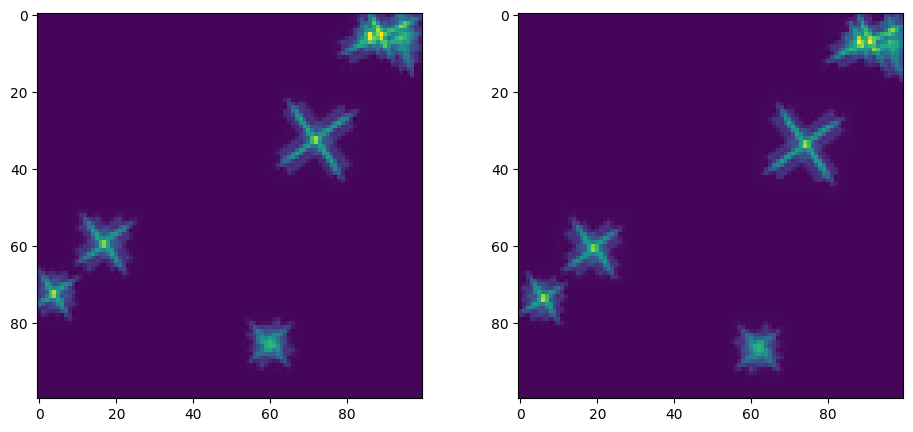

In [72]:
convolution = signal.convolve2d(background, template, boundary='fill', mode='same')
plt.figure(figsize=(30, 5))

plt.subplot(1, 5, 1)
plt.imshow(convolution)
plt.subplot(1, 5, 2)
plt.imshow(correlation)


In [ ]:
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches
template = flip_template_for_convolution(template)
# Function to slide the template and perform cross-correlation
def slide_and_correlate(background, template, step=10):
    images = []
    h, w = template.shape
    bg_h, bg_w = background.shape

    for y in range(0, bg_h - h + 1, step):
        for x in range(0, bg_w - w + 1, step):
            # Create a copy of the background for highlighting
            highlighted = background.copy()

            # Place a red box on the current position of the template
            highlighted[y:y+h, x:x+w] = 0.5  # Highlight the area
            images.append((highlighted, x, y))
    return images

# Create the sequence of images for the GIF
images_for_gif = slide_and_correlate(background, template)

def update(frame):
    highlighted, x, y = images_for_gif[frame]
    ax.clear()  # Clear the previous image

    # Show the background
    ax.imshow(highlighted, cmap='gray')

    # Overlay the template at the current position
    # Assuming template is a binary image (0s and 1s), multiply by 0.5 for visibility
    template_overlay = np.zeros_like(highlighted)
    template_overlay[y:y+template.shape[0], x:x+template.shape[1]] = template * 0.5
    ax.imshow(template_overlay, cmap='gray', alpha=0.5)  # Set alpha for transparency

    # Add the rectangle to highlight the template area
    rect.set_xy((x, y))
    ax.add_patch(rect)

    ax.axis('off')
    ax.set_title("Sliding the Template for Cross-Correlation")

    print(f"Processing frame {frame + 1}/{len(images_for_gif)}")  # Progress in

# Prepare the figure for animation
fig, ax = plt.subplots()
ax.imshow(background, cmap='gray')
ax.set_title("Sliding the Template for Cross-Correlation")
ax.axis('off')

# Add a rectangle to represent the template
rect = patches.Rectangle((0, 0), template.shape[1], template.shape[0], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Create the animation
ani = FuncAnimation(fig, update, frames=len(images_for_gif), interval=100, repeat=False)

# Save the animation as a GIF
gif_filename = './cross_correlation_demo.gif'
ani.save(gif_filename, writer='imagemagick')


In [ ]:
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches
import time

# Function to slide the template and perform convolution
def slide_and_convolve(background, template, step=10):
    # Flip the template for convolution
    conv_template = np.flip(template)

    images = []
    h, w = conv_template.shape
    bg_h, bg_w = background.shape

    for y in range(0, bg_h - h + 1, step):
        for x in range(0, bg_w - w + 1, step):
            highlighted = background.copy()
            highlighted[y:y+h, x:x+w] = 0.5  # Highlight the area
            images.append((highlighted, x, y))
    return images

# Function to flip the template for convolution
def flip_template_for_convolution(template):
    return np.flipud(np.fliplr(template))

template = flip_template_for_convolution(template)

conv_images_for_gif = slide_and_convolve(background, template)

def update(frame):
    highlighted, x, y = conv_images_for_gif[frame]
    ax.clear()  # Clear the previous image

    ax.imshow(highlighted, cmap='gray')

    template_overlay = np.zeros_like(highlighted)
    template_overlay[y:y+template.shape[0], x:x+template.shape[1]] = template * 0.5
    ax.imshow(template_overlay, cmap='gray', alpha=0.5)  # Set alpha for transparency

    rect.set_xy((x, y))
    ax.add_patch(rect)

    ax.axis('off')
    ax.set_title("Sliding the Template for Convolution")

    print(f"Processing frame {frame + 1}/{len(conv_images_for_gif)}")  # Progress indicator

fig, ax = plt.subplots()
ax.imshow(background, cmap='gray')
ax.set_title("Sliding the Template for Convolution")
ax.axis('off')

rect = patches.Rectangle((0, 0), template.shape[1], template.shape[0], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

ani = FuncAnimation(fig, update, frames=len(conv_images_for_gif), interval=100, repeat=False)

start_time = time.time()
conv_gif_filename = 'convolution_demo.gif'
ani.save(conv_gif_filename, writer='imagemagick')
print(f"Time taken: {time.time() - start_time:.2f} seconds")



In [51]:
!xdg-open ./

### Chamfer Matching

In [3]:
import cv2
import numpy as np

def chamfer_matching(template, target):
    # Assume template and target are already loaded as grayscale images (NumPy arrays)

    # Edge detection using Canny
    edges_template = cv2.Canny(template, 50, 150)
    edges_target = cv2.Canny(target, 50, 150)

    # Compute the distance transform of the target
    dist_transform = cv2.distanceTransform(~edges_target, cv2.DIST_L2, 3)

    # Initialize Chamfer distance
    chamfer_distance = np.inf
    best_position = (0, 0)

    # Slide the template over the target image
    for y in range(dist_transform.shape[0] - edges_template.shape[0]):
        for x in range(dist_transform.shape[1] - edges_template.shape[1]):
            # Extract the region from the distance transform
            region = dist_transform[y:y+edges_template.shape[0], x:x+edges_template.shape[1]]

            # Calculate the Chamfer distance
            distance = np.sum(region[edges_template > 0])

            # Update the best position if a new minimum is found
            if distance < chamfer_distance:
                chamfer_distance = distance
                best_position = (x, y)

    # Draw rectangle around the matched region
    matched_img = cv2.cvtColor(target, cv2.COLOR_GRAY2BGR)
    cv2.rectangle(matched_img, best_position, (best_position[0] + edges_template.shape[1], best_position[1] + edges_template.shape[0]), (0, 255, 0), 2)

    # Show the result
    cv2.imshow('Template', template)
    cv2.imshow('dsita_traform', dist_transform)
    cv2.imshow('Matched', matched_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
# Example usage with NumPy arrays
target = cv2.imread('signal.png', 0)
template = target[70:275, 65:265].copy()
#plt.imshow(template)
chamfer_matching(template, target)

In [12]:
! git commit -am "mediam filter"
! git push

[main 45b2e96] mediam filter
 1 file changed, 36 insertions(+), 15 deletions(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 12 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 994.95 KiB | 7.26 MiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:mangele/ComputerVision.git
   367f628..45b2e96  main -> main
